In [1]:
# pytorch extracting features from the pytorch network
# https://discuss.pytorch.org/t/how-to-extract-features-of-an-image-from-a-trained-model/119/8
# total variational loss explanation
# https://towardsdatascience.com/pytorch-implementation-of-perceptual-losses-for-real-time-style-transfer-8d608e2e9902
# model size estimator
# https://github.com/jacobkimmel/pytorch_modelsize
from torchvision.models import vgg


In [3]:
model = vgg.vgg19(pretrained =True)

In [4]:
import torch
use_gpu = torch.cuda.is_available()
if use_gpu:
    model.cuda()
model.eval()
print (use_gpu)
print (model.features)


True
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, paddin

In [5]:
names = ['conv11', 'relu11', 'conv12', 'relu12', 'maxpool1', 
     'conv21', 'relu21', 'conv22','relu22', 'maxpool2',
      'conv31', 'relu31', 'conv32','relu32', 'conv33', 'relu33', 'conv34','relu34','maxpool3',
      'conv41', 'relu41', 'conv42','relu42', 'conv43', 'relu43', 'conv44','relu44','maxpool4',
      'conv51', 'relu51', 'conv52','relu52', 'conv53', 'relu53', 'conv54','relu54','maxpool5',
       ]
style = ['relu12', 'relu22', 'relu33', 'relu43', 'relu54']
content = ['relu43']


In [6]:
import torch.nn as nn
import torch.nn.functional as F
class SelectiveSequential(nn.Module):
    def __init__(self, to_select, modules_dict):
        super(SelectiveSequential, self).__init__()
        for key, module in zip (names, modules_dict):
            self.add_module(key, module)
        self._to_select = to_select
        
    
    def forward(self, x):
        list = []
        for name, module in self._modules.items():
            #print("here")
            x = module(x)
            #print (x)
            if name in self._to_select:
                print (name)
                list.append(x)
        return list

In [7]:
class Net(nn.Module):
    def __init__(self, select):
        super(Net, self).__init__()
        self.features = SelectiveSequential(
            select,
            model.features
        )

    def forward(self, x):
        return self.features(x)

In [8]:
class Generator (nn.Module):
    def __init__(self):
        super (Generator, self).__init__()
        #num_features1 = 32
        #num_channels =3
        self.conv1 = nn.Conv2d(3, 32, 9, 1, padding =4)
        self.inst1= nn.InstanceNorm2d(32,affine = True)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, padding = 1)
        self.inst2= nn.InstanceNorm2d(64,affine = True)
        self.conv3 = nn.Conv2d(64,128, 3,1, padding = 1)
        self.inst3= nn.InstanceNorm2d(128,affine = True)
        self.resid10 = nn.Conv2d(128,128,3,1, padding =1)
        self.res10= nn.InstanceNorm2d(128,affine = True)
        self.resid11 = nn.Conv2d(128,128,3,1, padding =1)
        self.res11= nn.InstanceNorm2d(128,affine = True)
        self.resid20 = nn.Conv2d(128,128,3,1, padding =1)
        self.res20= nn.InstanceNorm2d(128,affine = True)
        self.resid21 = nn.Conv2d(128,128,3,1, padding =1)
        self.res21= nn.InstanceNorm2d(128,affine = True)
        self.resid30 = nn.Conv2d(128,128,3,1, padding =1)
        self.res30= nn.InstanceNorm2d(128,affine = True)
        self.resid31 = nn.Conv2d(128,128,3,1, padding =1)
        self.res31= nn.InstanceNorm2d(128,affine = True)
        self.resid40 = nn.Conv2d(128,128,3,1, padding =1)
        self.res40= nn.InstanceNorm2d(128,affine = True)
        self.resid41 = nn.Conv2d(128,128,3,1, padding =1)
        self.res41= nn.InstanceNorm2d(128,affine = True)
        self.resid50 = nn.Conv2d(128,128,3,1, padding =1)
        self.res50= nn.InstanceNorm2d(128,affine = True)
        self.resid51 = nn.Conv2d(128,128,3,1, padding =1)
        self.res51= nn.InstanceNorm2d(128,affine = True)
        self.conv_t1 = nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1)
        self.con1 = nn.InstanceNorm2d(64,affine = True)
        self.conv_t2 = nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1)
        self.con2 = nn.InstanceNorm2d(32,affine = True)
        self.conv_t3 = nn.Conv2d(32, 3, 9, stride=1, padding=4)
        self.con3 = nn.InstanceNorm2d(3,affine = True)
        
        
        
    def _conv_layer(self, x, layer, norm, relu=True):
        
        x = layer(x)
        x = norm(x)
        if relu:
            x = F.relu(x)
        return x
    
    def _resid_layer(self, x, l1, l2, n1, n2):
        x1 = self._conv_layer(x,l1, n1)
        x1 = self._conv_layer(x1,l2, n2, relu = False)
        
        return x+x1
    
    def _conv_transp_layer(self, x, layer, norm):
        x = layer(x)
        x = norm(x)
        x = F.relu(x)
        return x
    
    
        
   

    def forward(self, x):
        x = self._conv_layer(x,self.conv1, self.inst1)
        x = self._conv_layer(x,self.conv2, self.inst2)
        x = self._conv_layer(x,self.conv3, self.inst3)
        x = self._resid_layer(x, self.resid10, self.resid11, self.res10, self.res11)
        x = self._resid_layer(x, self.resid20, self.resid21, self.res20, self.res21)
        x = self._resid_layer(x, self.resid30, self.resid31, self.res30, self.res31)
        x = self._resid_layer(x, self.resid40, self.resid41, self.res40, self.res41)
        x = self._resid_layer(x, self.resid50, self.resid51, self.res50, self.res51)
        x = self._conv_transp_layer(x, self.conv_t1, self.con1)
        x = self._conv_transp_layer(x, self.conv_t2, self.con2)
        x = self._conv_layer(x, self.conv_t3, self.con3, relu = False)
        x = F.sigmoid(x)
        return x
    
        

In [9]:
stl = Net(style)
cnt = Net(content)

In [10]:
if (use_gpu):
    cnt.cuda()
cnt.eval()

Net(
  (features): SelectiveSequential(
    (conv11): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu11): ReLU(inplace)
    (conv12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu12): ReLU(inplace)
    (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv21): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu21): ReLU(inplace)
    (conv22): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu22): ReLU(inplace)
    (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv31): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu31): ReLU(inplace)
    (conv32): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu32): ReLU(inplace)
    (conv33): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu33): ReLU(inplace)
    (conv34): 

In [11]:
if (use_gpu):
    stl.cuda()
stl.eval()
#m1.features

Net(
  (features): SelectiveSequential(
    (conv11): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu11): ReLU(inplace)
    (conv12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu12): ReLU(inplace)
    (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv21): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu21): ReLU(inplace)
    (conv22): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu22): ReLU(inplace)
    (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv31): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu31): ReLU(inplace)
    (conv32): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu32): ReLU(inplace)
    (conv33): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu33): ReLU(inplace)
    (conv34): 

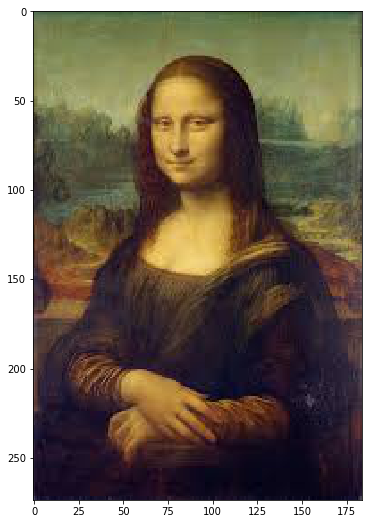

relu12
relu22
relu33
relu43
relu54
relu43


In [12]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
%matplotlib inline

image = cv2.imread('mona_lisa.jpg')


#print (image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(9,9))
plt.imshow(image)
plt.imshow(image)
plt.show()

#image preprocessing

image = cv2.resize(image,(224,224))
image = image/255
image = np.transpose(image, (2,0,1))
image = np.expand_dims(image, axis= 0) #batch size 1


# plot the image


trch = torch.from_numpy(image)
if (use_gpu):
    trch = trch.type(torch.cuda.FloatTensor)
else:
    trch = trch.type(torch.FloatTensor)
trch = Variable(trch)

result = model(trch)
stl_res = stl(trch)
cnt_res = cnt(trch)

In [13]:
#print(len(result[0][0]), result[0][0])
#print (result)
result = F.softmax(result, dim =1)
#print (result)
if use_gpu:
    res = result.detach().cpu().numpy()
else:
    res = result.data.numpy()
    
print (res)
lst = res[0]
indxs = [ind for ind,value in enumerate(lst) if value >.05]
print (result[mask])

[[3.32099356e-04 1.25703646e-05 3.36244702e-04 3.28255614e-04
  3.41225415e-04 9.73772258e-04 1.84737518e-03 4.01429606e-05
  1.10534420e-05 2.98026976e-06 5.51571077e-07 2.48535287e-07
  9.75090302e-07 3.00930446e-06 1.51464144e-06 3.78509071e-07
  1.84957315e-07 1.47265700e-06 2.12012651e-06 1.92151856e-06
  1.20474431e-06 1.64213759e-06 1.04060728e-05 3.82295802e-05
  1.79587539e-06 2.71104057e-07 3.69049599e-06 1.25036536e-06
  8.53687311e-07 1.02729929e-04 7.63893638e-07 2.00331868e-07
  1.75741854e-06 2.89393265e-05 4.22010460e-04 2.61518198e-06
  1.11635864e-05 5.07339848e-07 2.91539664e-06 4.01435955e-06
  7.77934815e-07 2.49101845e-06 6.45533135e-07 3.57165918e-05
  2.39521205e-06 2.21011396e-05 1.11692134e-06 4.30312667e-07
  1.07656946e-04 1.26598006e-05 3.43532265e-05 6.56655902e-05
  3.31318142e-06 1.31133049e-06 1.11592744e-05 4.18685801e-07
  8.60374655e-07 1.93441736e-07 1.72899072e-05 7.77891842e-07
  2.32985531e-05 7.40450787e-06 3.10817923e-05 2.23787520e-05
  2.9418

NameError: name 'mask' is not defined

In [14]:
print (indxs)

[461, 501, 601, 655, 735]


In [15]:
print (lst[indxs])

[0.05578409 0.19524457 0.08158607 0.06158986 0.07558976]


In [16]:
print (result[0][3])

tensor(1.00000e-04 *
       3.2826, device='cuda:0')


In [17]:
stl_res

[tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.8496,  0.2270,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.6274,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           ...,
           [ 0.5217,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.8661,  0.4016,  0.0000,  ...,  0.0000,  0.1887,  0.2973],
           [ 1.2743,  0.8398,  0.1717,  ...,  0.5158,  1.1028,  0.7181]],
 
          [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           ...,
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
          [[ 0.2244,  0.0000,  0.0000,  ...,  0.0118,  0.0249,  0.0000],
           [ 

In [18]:
def gram (feature_maps):
    #print (feature_maps)
    (b,ch,h,w) = feature_maps.size()
    print (b,ch,h,w)
    vector_map = feature_maps.view(b,ch, h*w)
    #print (vector)
    vector_map_T = vector_map.transpose(1,2)
    gram = torch.bmm (vector_map, vector_map_T)/(ch*h*w)
    return gram

In [19]:
print(len(stl_res[4][0][0]))

gram_res = [gram(feature) for feature in stl_res]
    


14
1 64 224 224
1 128 112 112
1 256 56 56
1 512 28 28
1 512 14 14


In [20]:
print (gram_res)

[tensor(1.00000e-02 *
       [[[ 0.1021,  0.0000,  0.1602,  ...,  0.1091,  0.0403,  0.0162],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.1602,  0.0000,  1.4058,  ...,  0.5652,  0.0642,  0.0659],
         ...,
         [ 0.1091,  0.0000,  0.5652,  ...,  0.3382,  0.0394,  0.0292],
         [ 0.0403,  0.0000,  0.0642,  ...,  0.0394,  0.0286,  0.0108],
         [ 0.0162,  0.0000,  0.0659,  ...,  0.0292,  0.0108,  0.0310]]], device='cuda:0'), tensor(1.00000e-02 *
       [[[ 0.2668,  0.0140,  0.0062,  ...,  0.0740,  0.0486,  0.0943],
         [ 0.0140,  0.0319,  0.0035,  ...,  0.0017,  0.0082,  0.0146],
         [ 0.0062,  0.0035,  0.0896,  ...,  0.0163,  0.0109,  0.0242],
         ...,
         [ 0.0740,  0.0017,  0.0163,  ...,  0.5660,  0.0561,  0.0942],
         [ 0.0486,  0.0082,  0.0109,  ...,  0.0561,  0.1459,  0.0748],
         [ 0.0943,  0.0146,  0.0242,  ...,  0.0942,  0.0748,  0.3809]]], device='cuda:0'), tensor(1.00000e-02 *
       [[[ 0.967

In [21]:
from torch.optim import Adam

def train(content_targets, style_target, content_weight = 1, style_weight = 1000, 
             tv_weight = 2000, batch_size = 8, learning_rate =.001, epochs = 2):
    use_gpu = torch.cuda.is_available()
    
    
    stl = Net(style)
    transform = Generator()
    if use_gpu:
        stl.cuda()
        transform.cuda()
    stl.eval()
    transform.train()
    optimizer = Adam(transform.parameters(), learning_rate)
    mse_loss = torch.nn.MSELoss()

    st_features = stl(style_target)
    
    # gram matrix for style only need to be computed once
    gram_st = [gram(feature) for feature in st_features]

   
    for e in range(epochs):
        
        cnt_loss = 0
        st_loss = 0
        tv_l = 0
        count = 0
        for batch, y_c in enumerate(content_targets):
            #y_c = data['image']
            
            n_batch = len(y_c)
            
            optimizer.zero_grad()
            
            if use_gpu:
                y_c = y_c.cuda()

            y_t = transform(y_c)
            features_yt = stl(y_t)
            features_yc = stl(y_c)

            #f_xc_c = Variable(features_xc[1].data, requires_grad=False)

            content_loss = content_weight * mse_loss(features_yc[3], features_yt[3])

            style_loss = 0.
            for m in range(len(gram_st)):
                #gram_s = Variable(gram_style[m].data, requires_grad=False)
                gram_yt = gram(features_yt[m])
                for i in range (n_batch):
                    style_loss += style_weight * mse_loss(gram_yt, gram_st[m,0, :, :])
                    
            tv_loss = tv_weight* (torch.sum(torch.abs(y[:, :, :, :-1] - y[:, :, :, 1:])) + 
            torch.sum(torch.abs(y[:, :, :-1, :] - y[:, :, 1:, :])))

            total_loss = content_loss + style_loss + tv_loss
            total_loss.backward()
            optimizer.step()

            running_loss =+ total_loss[0]
            cnt_loss += content_loss[0]
            st_loss += style_loss[0]
            tv_l += tv_loss[0]
            if batch % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}, Content_loss: {}, Style_loss: {}, regulariazation loss: {}'
                      .format(epoch + 1, batch+1, running_loss/1000), cnt_loss, st_loss, tv_l)
                running_loss = 0.0
                cnt_loss = 0
                st_loss = 0
                tv_l = 0
        print('Finished Training')


In [22]:
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# the dataset 
#from data_load import StyleTransferDataset


# define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([transforms.Resize(300),
                                     transforms.RandomCrop(256),
                                     transforms.ToTensor()
                                     #transforms.Normalize([0.48462227599918, 0.45624044862054, 0.40588363755159],
                                     #                    [0.22889466674951, 0.22446679341259, 0.22495548344775])
                                     ])

In [23]:
from data_load import *
transformed_dataset = StyleTransferDataset(root_dir='data/training/',
                                             transform=data_transform)

0 torch.Size([3, 256, 256])


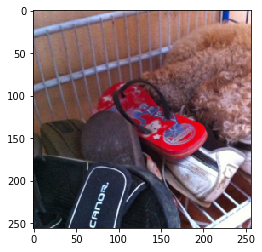

1 torch.Size([3, 256, 256])


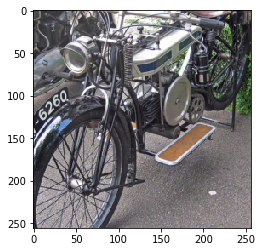

2 torch.Size([3, 256, 256])


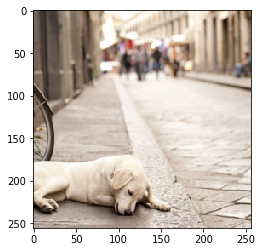

3 torch.Size([3, 256, 256])


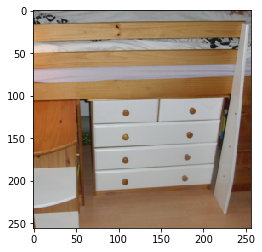

In [24]:
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample.size())
    
    #print(sample)
    im = sample.numpy()
    #print (im.shape)
    im = im.transpose(1,2,0)
    #print (im.shape)
    plt.imshow(im)
    plt.show()

In [25]:
batch_size = 2

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

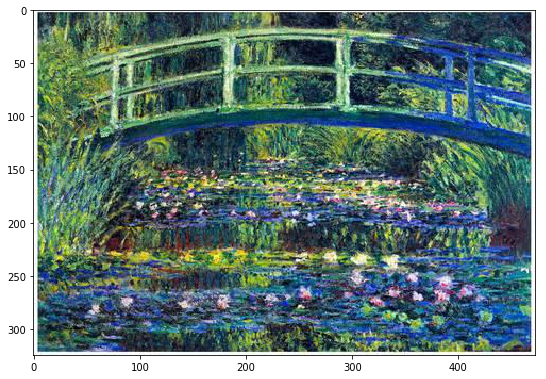

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable

use_gpu = torch.cuda.is_available()

style_im = cv2.imread('data/style/waterlily.jpg')


#print (image)
style_im = cv2.cvtColor(style_im, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(9,9))
plt.imshow(style_im)
plt.imshow(style_im)
plt.show()

#image preprocessing

style_im = cv2.resize(style_im,(256,256))
style_im = style_im/255
style_im = np.transpose(style_im, (2,0,1))
style_im = np.expand_dims(style_im, axis= 0) #batch size 1


# plot the image


trch = torch.from_numpy(style_im)
if (use_gpu):
    trch = trch.type(torch.cuda.FloatTensor)
else:
    trch = trch.type(torch.FloatTensor)
trch = Variable(trch)



In [27]:
train(train_loader,trch)

relu12
relu22
relu33
relu43
relu54
1 64 256 256
1 128 128 128
1 256 64 64
1 512 32 32
1 512 16 16
relu12


RuntimeError: cuda runtime error (2) : out of memory at c:\programdata\miniconda3\conda-bld\pytorch_1524543037166\work\aten\src\thc\generic/THCStorage.cu:58

In [34]:
print (type (train_loader))
for batch, data in train_loader:
    print (batch)

<class 'torch.utils.data.dataloader.DataLoader'>


ValueError: too many values to unpack (expected 2)